In [45]:
import os
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import glob
import dateutil
from datetime 
from datetime import date, timedelta

In [19]:
from datetime import date, timedelta

def get_dates_between(start_date, end_date):
    delta = end_date - start_date   # returns timedelta
    for i in range(delta.days + 1):
        days.append(start_date + timedelta(days=i))


In [86]:
# Get the energy Data

path = r'/Users/drewober/Documents/ADS MS/SU24 - H515/Project/AES Indiana energy use.csv' # use your path
# Get the files from the path provided in the OP

energyMeter_df = pd.read_csv(path, index_col=None, header=0)
energyMeter_df.Date = pd.to_datetime(energyMeter_df.Date,
               format='%Y-%m-%d')

energyMeter_df['Start Time'] = pd.to_datetime(energyMeter_df['Start Time'].apply(dateutil.parser.parse), utc=True)
energyMeter_df['End Time'] = pd.to_datetime(energyMeter_df['End Time'].apply(dateutil.parser.parse), utc=True)
#these provide static values or no real information (units is always kWh)
energyMeter_df = energyMeter_df.drop(columns=["Costs", "Name", "Type", "Units"]) 

energyMeter_df.info()
energyMeter_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Date        5842 non-null   datetime64[ns]     
 1   Start Time  5842 non-null   datetime64[ns, UTC]
 2   End Time    5842 non-null   datetime64[ns, UTC]
 3   Usage       5842 non-null   float64            
 4   Weather     5842 non-null   int64              
dtypes: datetime64[ns, UTC](2), datetime64[ns](1), float64(1), int64(1)
memory usage: 228.3 KB


,Usage,Weather
count,5842.000000,5842.000000
mean,0.956887,49.308285
std,0.926726,16.521203
min,0.148800,-4.000000
25%,0.255600,37.000000
50%,0.622800,49.000000
75%,1.281000,62.000000
max,8.226000,90.000000


In [8]:
path = r'/Users/drewober/Documents/ADS MS/SU24 - H515/Project/EcobeeData' # use your path
# Get the files from the path provided in the OP
all_files = os.listdir(path)  # .rglob to get subdirectories

fullPaths = []

for thisFile in all_files:
    fullPaths.append(path + '/' + thisFile)  
    
li = []

for filename in fullPaths:
    df = pd.read_csv(filename, index_col=None, header=0, skiprows = 4, usecols=[i for i in range(22)])
    li.append(df)
    
print(li)





[            Date      Time System Setting        System Mode Calendar Event  \
0     2022-11-01  00:00:00           cool  compressorCoolOff            NaN   
1     2022-11-01  00:05:00           cool  compressorCoolOff            NaN   
2     2022-11-01  00:10:00           cool  compressorCoolOff            NaN   
3     2022-11-01  00:15:00           cool  compressorCoolOff            NaN   
4     2022-11-01  00:20:00           cool  compressorCoolOff            NaN   
...          ...       ...            ...                ...            ...   
8635  2022-11-30  22:35:00           heat  compressorHeatOff            NaN   
8636  2022-11-30  22:40:00           heat  compressorHeatOff            NaN   
8637  2022-11-30  22:45:00           heat  compressorHeatOff            NaN   
8638  2022-11-30  22:50:00           heat  compressorHeatOff            NaN   
8639  2022-11-30  22:55:00           heat  compressorHeatOff            NaN   

     Program Mode  Cool Set Temp (F)  Heat Set Tem

In [9]:
alldf = pd.concat(li, ignore_index=True)
alldf.describe()
alldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166464 entries, 0 to 166463
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        166464 non-null  object 
 1   Time                        166464 non-null  object 
 2   System Setting              165895 non-null  object 
 3   System Mode                 165895 non-null  object 
 4   Calendar Event              12769 non-null   object 
 5   Program Mode                165895 non-null  object 
 6   Cool Set Temp (F)           165895 non-null  float64
 7   Heat Set Temp (F)           165895 non-null  float64
 8   Current Temp (F)            165895 non-null  float64
 9   Current Humidity (%RH)      165895 non-null  float64
 10  Outdoor Temp (F)            165510 non-null  float64
 11  Wind Speed (km/h)           165510 non-null  float64
 12  Cool Stage 1 (sec)          165895 non-null  float64
 13  Heat Stage 1 (

In [12]:
combDateTime = alldf.Date + ' ' + alldf.Time


newDateTime = pd.to_datetime(combDateTime,
               format='%Y-%m-%d %H:%M:%S')


alldf['Datetime'] = newDateTime


alldf=alldf.drop(columns=["Calendar Event", "DM Offset"])
alldf.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166464 entries, 0 to 166463
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Datetime                    166464 non-null  datetime64[ns]
 1   Date                        166464 non-null  object        
 2   Time                        166464 non-null  object        
 3   System Setting              165895 non-null  object        
 4   System Mode                 165895 non-null  object        
 5   Program Mode                165895 non-null  object        
 6   Cool Set Temp (F)           165895 non-null  float64       
 7   Heat Set Temp (F)           165895 non-null  float64       
 8   Current Temp (F)            165895 non-null  float64       
 9   Current Humidity (%RH)      165895 non-null  float64       
 10  Outdoor Temp (F)            165510 non-null  float64       
 11  Wind Speed (km/h)           165510 non-

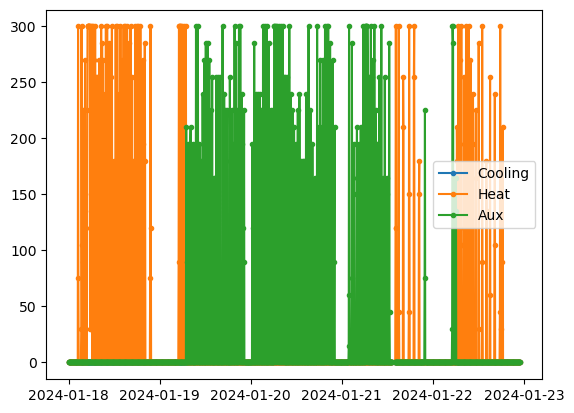

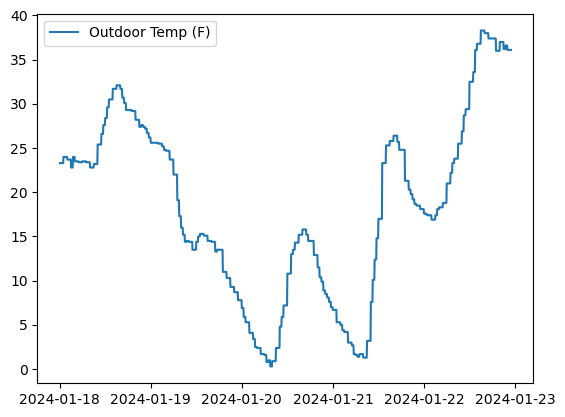

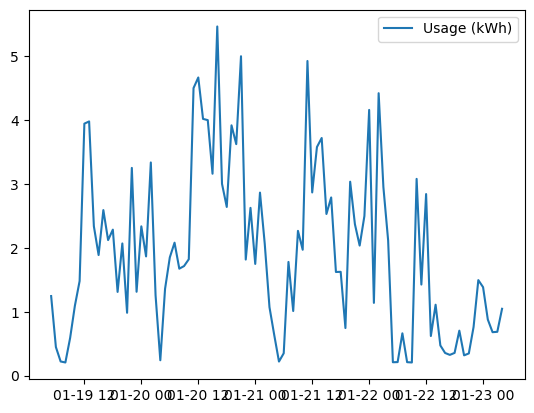

In [167]:
A = alldf.Datetime > pd.to_datetime('2024-01-18 00:00:00')
B = alldf.Datetime < pd.to_datetime('2024-01-22 22:59:59')
plotdf = alldf.loc[(A) & (B)]

fig1 = plt.figure()
plt.plot(plotdf.Datetime, plotdf["Cool Stage 1 (sec)"], '.-', label='Cooling')
plt.plot(plotdf.Datetime, plotdf["Heat Stage 1 (sec)"], '.-', label='Heat')
plt.plot(plotdf.Datetime, plotdf["Aux Heat 1 (sec)"], '.-', label='Aux')
plt.legend();

fig3 = plt.figure()
plt.plot(plotdf.Datetime, plotdf["Outdoor Temp (F)"], label='Outdoor Temp (F)')
plt.legend();

C = energyMeter_df.Date > pd.to_datetime('2024-01-18 00:00:00')
D = energyMeter_df.Date < pd.to_datetime('2024-01-22 23:59:59')


fig2 = plt.figure()
engPlotdf = energyMeter_df.loc[(C) & (D)]
plt.plot(engPlotdf['Start Time'], engPlotdf.Usage, label='Usage (kWh)')
plt.legend();

## Data Conditioning

After the preprocessing meeting, there were a few changes to make to the data

1. make variable names friendly 
2. make a wide table where procceeding data is in the same row
3. This will mean removing days where there are gaps in preceeding data
4. remove identifying data

# Parameters

## Thermostat + Weather Data

### Datetime
This has been converted to a datetime that covers the proceeding five minutes. Mainly, this will be used as an ordered index

### Date -> unused
### Time -> unused
### System Setting ->unused
This parameter is reflected in the operation data (and it is hard to condition)



____

## Energy Data

In [ ]:
newParam Names = [
    "Datetime",
    "Date_UNUSED"
    "Time_UNUSED"
    "sysSetting"
    "sysMode"
    "calEvent"
    "progMode"
    "coolSetTemp"
    "heatSetTemp"
    "curTemp"
    "curHumid"
    "oat"
    "windSpeed_UNUSED"
    "coolStage1"
    "heatStage1"
    
]

# Transforming Data

Since the energy meter data is in hour intervals, the thermostat data will need to be combined and aggregated per hour. I plan to retain 1 day to 7 days of preceeding data for each observation if possible. Timestamps are hard to compare... I think I will convert the timestamps to a duration and then order t


In [251]:
timeKey = pd.timedelta_range(start='0 hour', end='23 hour', freq='1h')
timeInt = range(0,24,1)

print(len(timeKey))
print(len(timeInt))

TimeConvert = {timeKey[i]: timeInt[i] for i in range(len(timeKey))}


print(TimeConvert)
print(localDur.loc[0])

hourInt = TimeConvert[localDur.loc[0]]
print(hourInt)

24
24
{Timedelta('0 days 00:00:00'): 0, Timedelta('0 days 01:00:00'): 1, Timedelta('0 days 02:00:00'): 2, Timedelta('0 days 03:00:00'): 3, Timedelta('0 days 04:00:00'): 4, Timedelta('0 days 05:00:00'): 5, Timedelta('0 days 06:00:00'): 6, Timedelta('0 days 07:00:00'): 7, Timedelta('0 days 08:00:00'): 8, Timedelta('0 days 09:00:00'): 9, Timedelta('0 days 10:00:00'): 10, Timedelta('0 days 11:00:00'): 11, Timedelta('0 days 12:00:00'): 12, Timedelta('0 days 13:00:00'): 13, Timedelta('0 days 14:00:00'): 14, Timedelta('0 days 15:00:00'): 15, Timedelta('0 days 16:00:00'): 16, Timedelta('0 days 17:00:00'): 17, Timedelta('0 days 18:00:00'): 18, Timedelta('0 days 19:00:00'): 19, Timedelta('0 days 20:00:00'): 20, Timedelta('0 days 21:00:00'): 21, Timedelta('0 days 22:00:00'): 22, Timedelta('0 days 23:00:00'): 23}
0 days 00:00:00
0


In [274]:

# start date Energy = 2023-09-01
# end date Energy = 2024-05-16
# 259 days, going to do hourly data since I do not me

def assign_group(inTime):
    if pd.to_timedelta('00:00:00') <= inTime < pd.to_timedelta('04:00:00'):
        group=1
    elif pd.to_timedelta('04:00:00') <= inTime < pd.to_timedelta('8:00:00'):
        group=2
    elif pd.to_timedelta('08:00:00') <= inTime < pd.to_timedelta('12:00:00'):
        group=3
    elif pd.to_timedelta('12:00:00') <= inTime < pd.to_timedelta('16:00:00'):
        group=4
    elif pd.to_timedelta('16:00:00') <= inTime < pd.to_timedelta('20:00:00'):
        group=5
    elif pd.to_timedelta('20:00:00') <= inTime < pd.to_timedelta('24:00:00'):
        group=6
    return group


startDate = pd.Timestamp(2023,9,1) #datetime.date(year=2023,month=9,day=1)
localTime = energyMeter_df["Start Time"].dt.tz_convert('America/Indiana/Indianapolis')
localDur = localTime.apply(lambda x: timedelta(hours=x.hour, minutes=x.minute, seconds=x.second, microseconds=x.microsecond))
timeGroup = localDur.apply(assign_group)

timeKey = pd.timedelta_range(start='0 hour', end='23 hour', freq='1h')
timeInt = range(0,24,1)

TimeConvert = {timeKey[i]: timeInt[i] for i in range(len(timeKey))}

timeGroup = localDur.map(TimeConvert)


#main dataframe to compile all data
maindf = pd.DataFrame()

#create arrays to go into the big dataframe
dayIndex=[]
hourIndex=[]
dateOnly=[]
durationOnly=localDur
hSamples=[]
usage=[]
weather=[]
for numDay in range(213): #259totalinAES
    for numHourGroup in range(0, 24, 1):
        dayIndex.append(numDay)
        hourIndex.append(numHourGroup)
        currentDay = startDate + datetime.timedelta(days=numDay)
        dateOnly.append(currentDay)
        
        #create a df filter to get only the data needed from the main array
        #some days have no data... I will likely remove that data
        dateComp = (energyMeter_df["Date"] == currentDay) 
        hourComp = (timeGroup == numHourGroup)
        filt = dateComp&hourComp
        
        hSamples.append(sum(filt))
        usage.append(sum(energyMeter_df["Usage"].loc[filt]))
        weather.append(np.mean(energyMeter_df["Weather"].loc[filt]))


maindf["dayIndex"]=dayIndex
maindf["hourIndex"]=hourIndex
maindf["dateOnly"]=dateOnly
#maindf["durationOnly"]=durationOnly
maindf["hSamples"]=hSamples
maindf["usage"]=usage
maindf["weatherAES"]=weather
maindf.describe()
#at this point, the energy data has been combined into 4 hour samples and is ready for modeling

,dayIndex,hourIndex,hSamples,usage,weatherAES
count,5112.000000,5112.000000,5112.000000,5112.000000,4889.000000
mean,106.000000,11.500000,0.956573,0.929731,47.176314
std,61.493141,6.922864,0.204794,0.956718,16.448427
min,0.000000,0.000000,0.000000,0.000000,-4.000000
25%,53.000000,5.750000,1.000000,0.231600,35.000000
50%,106.000000,11.500000,1.000000,0.597600,46.000000
75%,159.000000,17.250000,1.000000,1.267200,59.000000
max,212.000000,23.000000,2.000000,8.226000,90.000000


In [271]:
#next, the thermostat data needs to be put into the 4 hour segments that were done for the AES data
#start date is still 2023-09-01
#end date 2023-03-31

timeKey2 = pd.timedelta_range(start='0 hour', end='23 hour 55 min', freq='5min')
timeInt2 = [i for i in range(24) for x in range(12)]

print(timeKey2)
print(timeInt2)

TimeConvert2 = {timeKey2[i]: timeInt2[i] for i in range(len(timeKey2))}

StartDate = pd.Timestamp(2023,9,1) #datetime.date(year=2023,month=9,day=1)
localDur = pd.to_timedelta(alldf.Time)
timeGroup = localDur.map(TimeConvert2) #this is only taking 1 sample
alldf.Date = pd.to_datetime(alldf.Date,
               format='%Y-%m-%d')


#create arrays to go into the big dataframe
dayIndex=[]
hourIndex=[]
dateOnly=[]
durationOnly=localDur
fiveMinSamples=[]


coolSet=[]
heatSet=[]
curT=[]
curHum=[]
oat=[]
wind=[]
coolStage1=[]
heatStage1=[]
auxStage1=[]
fan=[]
thermT=[]
thermHum=[]
thermMotion=[]
sensT=[]
sensMotion=[]

for numDay in range(259):
    for numHourGroup in range(0, 24, 1):
        print(numDay, numHourGroup)
        dayIndex.append(numDay)
        hourIndex.append(numHourGroup)
        currentDay = startDate + datetime.timedelta(days=numDay)
        dateOnly.append(currentDay)
        
        #create a df filter to get only the data needed from the main array
        #some days have no data... I will likely remove that data
        dateComp = (alldf.Date == currentDay) 
        hourComp = (timeGroup == numHourGroup)
        filt = dateComp&hourComp
        fiveMinSamples.append(sum(filt))
        
        #need to do something about system mode and program mode
        
        coolSet.append(np.mean(alldf["Cool Set Temp (F)"].loc[filt]))
        heatSet.append(np.mean(alldf["Heat Set Temp (F)"].loc[filt]))
        curT.append(np.mean(alldf["Current Temp (F)"].loc[filt]))
        curHum.append(np.mean(alldf["Current Humidity (%RH)"].loc[filt]))
        oat.append(np.mean(alldf["Outdoor Temp (F)"].loc[filt]))
        wind.append(np.mean(alldf["Wind Speed (km/h)"].loc[filt]))
        
        coolStage1.append(sum(alldf["Cool Stage 1 (sec)"].loc[filt]))
        heatStage1.append(sum(alldf["Heat Stage 1 (sec)"].loc[filt]))
        auxStage1.append(sum(alldf["Aux Heat 1 (sec)"].loc[filt]))
        fan.append(sum(alldf["Fan (sec)"].loc[filt]))
        
        thermT.append(np.mean(alldf["Thermostat Temperature (F)"].loc[filt]))
        thermHum.append(np.mean(alldf["Thermostat Humidity (%RH)"].loc[filt]))
        thermMotion.append(sum(alldf["Thermostat Motion"].loc[filt]))
        sensT.append(np.mean(alldf["SmartSensor (F)"].loc[filt]))
        sensMotion.append(sum(alldf["SmartSensor2"].loc[filt]))
        
ecobeedf = pd.DataFrame()
ecobeedf["dayIndexEco"]=dayIndex
ecobeedf["hourIndexEco"]=hourIndex
ecobeedf["dateOnlyEco"]=dateOnly

ecobeedf['fiveMinSamples'] = fiveMinSamples
ecobeedf['coolSet']=coolSet
ecobeedf['heatSet']=heatSet
ecobeedf['curT']=curT
ecobeedf['curHum']=curHum
ecobeedf['oat']=oat
ecobeedf['wind']=wind
ecobeedf['coolStage1']=coolStage1
ecobeedf['heatStage1']=heatStage1
ecobeedf['auxStage1']=auxStage1
ecobeedf['fan']=fan
ecobeedf['thermT']=thermT
ecobeedf['thermHum']=thermHum
ecobeedf['thermMotion']=thermMotion
ecobeedf['sensT']=sensT
ecobeedf['sensMotion']=sensMotion



TimedeltaIndex(['0 days 00:00:00', '0 days 00:05:00', '0 days 00:10:00',
                '0 days 00:15:00', '0 days 00:20:00', '0 days 00:25:00',
                '0 days 00:30:00', '0 days 00:35:00', '0 days 00:40:00',
                '0 days 00:45:00',
                ...
                '0 days 23:10:00', '0 days 23:15:00', '0 days 23:20:00',
                '0 days 23:25:00', '0 days 23:30:00', '0 days 23:35:00',
                '0 days 23:40:00', '0 days 23:45:00', '0 days 23:50:00',
                '0 days 23:55:00'],
               dtype='timedelta64[ns]', length=288, freq='5T')
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

51 16
51 17
51 18
51 19
51 20
51 21
51 22
51 23
52 0
52 1
52 2
52 3
52 4
52 5
52 6
52 7
52 8
52 9
52 10
52 11
52 12
52 13
52 14
52 15
52 16
52 17
52 18
52 19
52 20
52 21
52 22
52 23
53 0
53 1
53 2
53 3
53 4
53 5
53 6
53 7
53 8
53 9
53 10
53 11
53 12
53 13
53 14
53 15
53 16
53 17
53 18
53 19
53 20
53 21
53 22
53 23
54 0
54 1
54 2
54 3
54 4
54 5
54 6
54 7
54 8
54 9
54 10
54 11
54 12
54 13
54 14
54 15
54 16
54 17
54 18
54 19
54 20
54 21
54 22
54 23
55 0
55 1
55 2
55 3
55 4
55 5
55 6
55 7
55 8
55 9
55 10
55 11
55 12
55 13
55 14
55 15
55 16
55 17
55 18
55 19
55 20
55 21
55 22
55 23
56 0
56 1
56 2
56 3
56 4
56 5
56 6
56 7
56 8
56 9
56 10
56 11
56 12
56 13
56 14
56 15
56 16
56 17
56 18
56 19
56 20
56 21
56 22
56 23
57 0
57 1
57 2
57 3
57 4
57 5
57 6
57 7
57 8
57 9
57 10
57 11
57 12
57 13
57 14
57 15
57 16
57 17
57 18
57 19
57 20
57 21
57 22
57 23
58 0
58 1
58 2
58 3
58 4
58 5
58 6
58 7
58 8
58 9
58 10
58 11
58 12
58 13
58 14
58 15
58 16
58 17
58 18
58 19
58 20
58 21
58 22
58 23
59 0
59 1
59 2

112 4
112 5
112 6
112 7
112 8
112 9
112 10
112 11
112 12
112 13
112 14
112 15
112 16
112 17
112 18
112 19
112 20
112 21
112 22
112 23
113 0
113 1
113 2
113 3
113 4
113 5
113 6
113 7
113 8
113 9
113 10
113 11
113 12
113 13
113 14
113 15
113 16
113 17
113 18
113 19
113 20
113 21
113 22
113 23
114 0
114 1
114 2
114 3
114 4
114 5
114 6
114 7
114 8
114 9
114 10
114 11
114 12
114 13
114 14
114 15
114 16
114 17
114 18
114 19
114 20
114 21
114 22
114 23
115 0
115 1
115 2
115 3
115 4
115 5
115 6
115 7
115 8
115 9
115 10
115 11
115 12
115 13
115 14
115 15
115 16
115 17
115 18
115 19
115 20
115 21
115 22
115 23
116 0
116 1
116 2
116 3
116 4
116 5
116 6
116 7
116 8
116 9
116 10
116 11
116 12
116 13
116 14
116 15
116 16
116 17
116 18
116 19
116 20
116 21
116 22
116 23
117 0
117 1
117 2
117 3
117 4
117 5
117 6
117 7
117 8
117 9
117 10
117 11
117 12
117 13
117 14
117 15
117 16
117 17
117 18
117 19
117 20
117 21
117 22
117 23
118 0
118 1
118 2
118 3
118 4
118 5
118 6
118 7
118 8
118 9
118 10
118 11
11

165 4
165 5
165 6
165 7
165 8
165 9
165 10
165 11
165 12
165 13
165 14
165 15
165 16
165 17
165 18
165 19
165 20
165 21
165 22
165 23
166 0
166 1
166 2
166 3
166 4
166 5
166 6
166 7
166 8
166 9
166 10
166 11
166 12
166 13
166 14
166 15
166 16
166 17
166 18
166 19
166 20
166 21
166 22
166 23
167 0
167 1
167 2
167 3
167 4
167 5
167 6
167 7
167 8
167 9
167 10
167 11
167 12
167 13
167 14
167 15
167 16
167 17
167 18
167 19
167 20
167 21
167 22
167 23
168 0
168 1
168 2
168 3
168 4
168 5
168 6
168 7
168 8
168 9
168 10
168 11
168 12
168 13
168 14
168 15
168 16
168 17
168 18
168 19
168 20
168 21
168 22
168 23
169 0
169 1
169 2
169 3
169 4
169 5
169 6
169 7
169 8
169 9
169 10
169 11
169 12
169 13
169 14
169 15
169 16
169 17
169 18
169 19
169 20
169 21
169 22
169 23
170 0
170 1
170 2
170 3
170 4
170 5
170 6
170 7
170 8
170 9
170 10
170 11
170 12
170 13
170 14
170 15
170 16
170 17
170 18
170 19
170 20
170 21
170 22
170 23
171 0
171 1
171 2
171 3
171 4
171 5
171 6
171 7
171 8
171 9
171 10
171 11
17

217 14
217 15
217 16
217 17
217 18
217 19
217 20
217 21
217 22
217 23
218 0
218 1
218 2
218 3
218 4
218 5
218 6
218 7
218 8
218 9
218 10
218 11
218 12
218 13
218 14
218 15
218 16
218 17
218 18
218 19
218 20
218 21
218 22
218 23
219 0
219 1
219 2
219 3
219 4
219 5
219 6
219 7
219 8
219 9
219 10
219 11
219 12
219 13
219 14
219 15
219 16
219 17
219 18
219 19
219 20
219 21
219 22
219 23
220 0
220 1
220 2
220 3
220 4
220 5
220 6
220 7
220 8
220 9
220 10
220 11
220 12
220 13
220 14
220 15
220 16
220 17
220 18
220 19
220 20
220 21
220 22
220 23
221 0
221 1
221 2
221 3
221 4
221 5
221 6
221 7
221 8
221 9
221 10
221 11
221 12
221 13
221 14
221 15
221 16
221 17
221 18
221 19
221 20
221 21
221 22
221 23
222 0
222 1
222 2
222 3
222 4
222 5
222 6
222 7
222 8
222 9
222 10
222 11
222 12
222 13
222 14
222 15
222 16
222 17
222 18
222 19
222 20
222 21
222 22
222 23
223 0
223 1
223 2
223 3
223 4
223 5
223 6
223 7
223 8
223 9
223 10
223 11
223 12
223 13
223 14
223 15
223 16
223 17
223 18
223 19
223 20
223

In [276]:
ecobeedf.describe()
ecobeedf.loc[ecobeedf.fiveMinSamples >12]
#Daylight savings time double counts! this will need thrown out with
ecobeedf.loc[ecobeedf.fiveMinSamples <12]
#only a small portion without full samples
#hard part is nonsequential datapoints might "poison" the 


,dayIndexEco,hourIndexEco,dateOnlyEco,fiveMinSamples,coolSet,heatSet,curT,curHum,oat,wind,coolStage1,heatStage1,auxStage1,fan,thermT,thermHum,thermMotion,sensT,sensMotion
4586,191,2,2024-03-10,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0
5112,213,0,2024-04-01,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0
5113,213,1,2024-04-01,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0
5114,213,2,2024-04-01,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0
5115,213,3,2024-04-01,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6211,258,19,2024-05-16,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0
6212,258,20,2024-05-16,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0
6213,258,21,2024-05-16,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0
6214,258,22,2024-05-16,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0


In [275]:
df = maindf.join(ecobeedf)
df.describe()
df.to_csv('combined_data.csv')
#save to a csv to open in the next notebook. There is still bad data but now it needs to be made into
# a wide table. When the wide tablle is made, then the bad data will be removed.